## РК2 Андреев А.В. ИУ5-61Б  Вариант 2

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
boston = load_iris()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['TARGET'] = boston.target

In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TARGET
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
TARGET                 int64
dtype: object

In [5]:
data.isnull().sum()
# проверим есть ли пропущенные значения

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
TARGET               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   TARGET             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TARGET
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

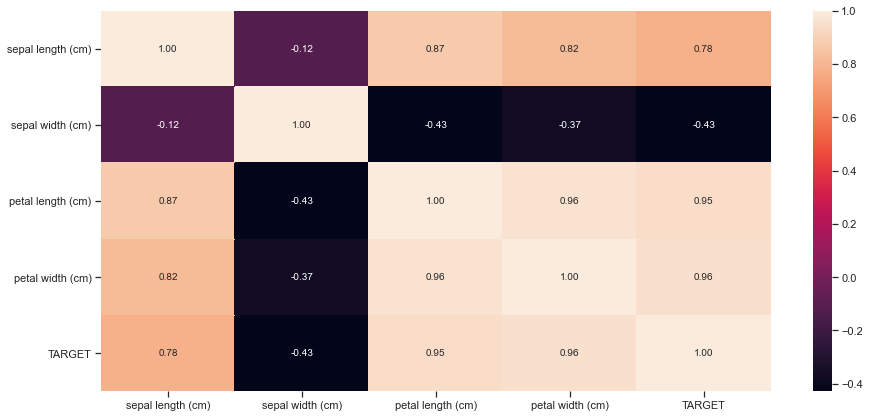

In [8]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [9]:
X = data.drop(['TARGET'], axis = 1)
Y = data.TARGET
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 

Выходные данные:

 0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64


In [10]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
37                4.9               3.6                1.4               0.1
78                6.0               2.9                4.5               1.5
90                5.5               2.6                4.4               1.2
45                4.8               3.0                1.4               0.3
16                5.4               3.9                1.3               0.4 

Входные параметры тестовой выборки:

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2
107                7.3               2.9                6.3               1.8
7                  5.0               3.4                1.5          

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 
from sklearn.svm import SVR

In [12]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

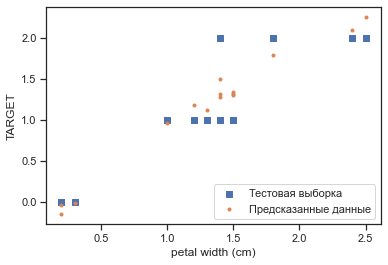

In [13]:
plt.scatter(X_test['petal width (cm)'], Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test['petal width (cm)'], lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('petal width (cm)')
plt.ylabel ('TARGET')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [16]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 0.0
Средняя квадратичная ошибка: 0.0
Median absolute error: 0.0
Коэффициент детерминации: 1.0


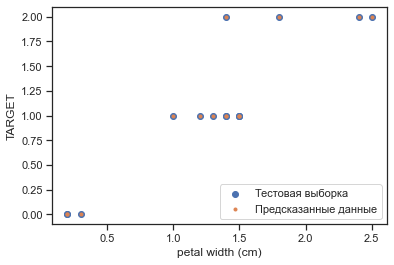

In [17]:
plt.scatter(X_test['petal width (cm)'], Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test['petal width (cm)'], Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('petal width (cm)')
plt.ylabel('TARGET')
plt.show()